In [35]:
import pandas as pd
import numpy.random as rnd
from MCForecastTools import MCSimulation
import pathlib as Path

In [36]:
ng_df = pd.read_csv('../Marc/Resources/NG_Nymex_Max-2023-2013.csv')
wti_df = pd.read_csv('../Marc/Resources/WTI_Nymex_Max-2023-2013.csv')

In [37]:
ng_df=ng_df.drop(columns=['Volume','Open', 'High', 'Low'])
ng_df.columns=('date','close')
ng_df


,date,close
0,01/18/2023,3.311
1,01/17/2023,3.586
2,01/13/2023,3.419
3,01/12/2023,3.695
4,01/11/2023,3.671
...,...,...
2538,01/25/2013,3.444
2539,01/24/2013,3.446
2540,01/23/2013,3.554
2541,01/22/2013,3.558


In [38]:
wti_df=wti_df.drop(columns=['Volume','Open', 'High', 'Low'])
wti_df.columns=('date','close')
wti_df

,date,close
0,01/18/2023,79.48
1,01/17/2023,80.18
2,01/13/2023,79.86
3,01/12/2023,78.39
4,01/11/2023,77.41
...,...,...
2538,01/25/2013,95.88
2539,01/24/2013,95.95
2540,01/23/2013,95.23
2541,01/22/2013,96.24


In [39]:
to_merge_dict = {'NG': ng_df , 'WTI': wti_df}
to_merge_dict

{'NG':             date  close
 0     01/18/2023  3.311
 1     01/17/2023  3.586
 2     01/13/2023  3.419
 3     01/12/2023  3.695
 4     01/11/2023  3.671
 ...          ...    ...
 2538  01/25/2013  3.444
 2539  01/24/2013  3.446
 2540  01/23/2013  3.554
 2541  01/22/2013  3.558
 2542  01/21/2013  3.566
 
 [2543 rows x 2 columns],
 'WTI':             date  close
 0     01/18/2023  79.48
 1     01/17/2023  80.18
 2     01/13/2023  79.86
 3     01/12/2023  78.39
 4     01/11/2023  77.41
 ...          ...    ...
 2538  01/25/2013  95.88
 2539  01/24/2013  95.95
 2540  01/23/2013  95.23
 2541  01/22/2013  96.24
 2542  01/21/2013  95.56
 
 [2543 rows x 2 columns]}

In [40]:
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())

In [41]:
merged_df

NG                WTI       
            date  close        date  close
0     01/18/2023  3.311  01/18/2023  79.48
1     01/17/2023  3.586  01/17/2023  80.18
2     01/13/2023  3.419  01/13/2023  79.86
3     01/12/2023  3.695  01/12/2023  78.39
4     01/11/2023  3.671  01/11/2023  77.41
...          ...    ...         ...    ...
2538  01/25/2013  3.444  01/25/2013  95.88
2539  01/24/2013  3.446  01/24/2013  95.95
2540  01/23/2013  3.554  01/23/2013  95.23
2541  01/22/2013  3.558  01/22/2013  96.24
2542  01/21/2013  3.566  01/21/2013  95.56

[2543 rows x 4 columns]

In [42]:
ten_year_simulation = MCSimulation(
    portfolio_data=merged_df,
    weights=[0.50, 0.50],
    num_simulation=100,
    num_trading_days=252*10,
)

In [43]:
ten_year_simulation.portfolio_data.head()

NG                             WTI                    
         date  close daily_return        date  close daily_return
0  01/18/2023  3.311          NaN  01/18/2023  79.48          NaN
1  01/17/2023  3.586     0.083056  01/17/2023  80.18     0.008807
2  01/13/2023  3.419    -0.046570  01/13/2023  79.86    -0.003991
3  01/12/2023  3.695     0.080725  01/12/2023  78.39    -0.018407
4  01/11/2023  3.671    -0.006495  01/11/2023  77.41    -0.012502

In [44]:
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.940433,1.044563,0.952268,0.938204,1.011456,1.013531,0.925931,1.035861,1.081953,1.011791,...,0.912538,1.078743,1.112043,1.022501,1.030210,0.948262,0.974646,1.041047,0.898861,1.046417
2,1.009671,1.031118,1.004729,0.835502,1.014584,0.950990,0.914746,1.161090,1.101035,0.986151,...,0.967068,1.024551,1.079386,1.058458,1.064724,0.976194,1.041896,1.000128,0.933748,1.000230
3,1.015182,0.995079,1.002287,0.891264,1.000428,0.913182,0.877970,1.258044,1.001678,0.998707,...,1.018023,1.090172,1.105452,1.065339,1.071590,0.976769,1.203366,1.036751,0.899777,0.964431
4,0.979817,1.040962,1.050827,0.954073,0.906391,0.883825,0.833548,1.179551,0.961666,0.903748,...,1.015032,1.216228,1.026358,1.074114,1.165730,0.984288,1.146379,1.067095,0.888886,0.956098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.001359,0.000005,0.002416,0.332762,0.000364,0.005941,0.050924,0.012261,0.031762,0.000361,...,0.000072,0.003186,0.003938,0.014286,0.003626,0.001272,0.000788,0.002338,0.008770,0.003633
2517,0.001420,0.000005,0.002323,0.361741,0.000362,0.005814,0.057586,0.011289,0.035913,0.000359,...,0.000071,0.003536,0.003739,0.013593,0.003804,0.001344,0.000775,0.002322,0.008894,0.003336
2518,0.001358,0.000005,0.002264,0.334884,0.000344,0.006355,0.059495,0.011046,0.032537,0.000373,...,0.000072,0.003169,0.003779,0.012447,0.003872,0.001415,0.000726,0.002367,0.008206,0.003235
2519,0.001240,0.000004,0.002199,0.336931,0.000349,0.006014,0.063995,0.010327,0.033516,0.000382,...,0.000069,0.003115,0.003718,0.011444,0.003918,0.001318,0.000715,0.002619,0.008114,0.003160


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

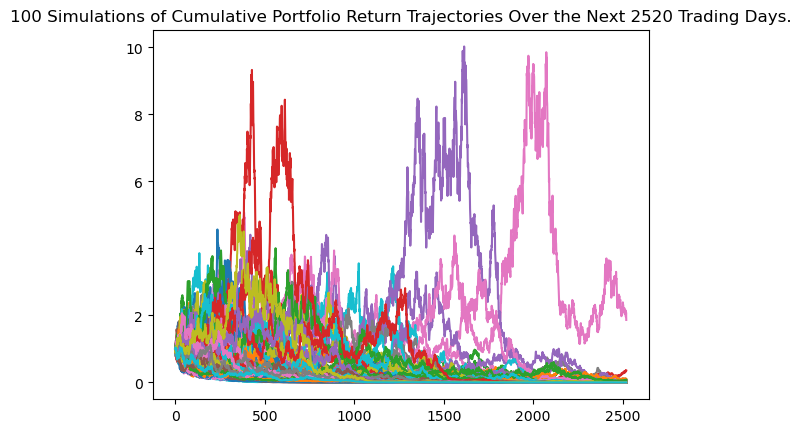

In [45]:
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

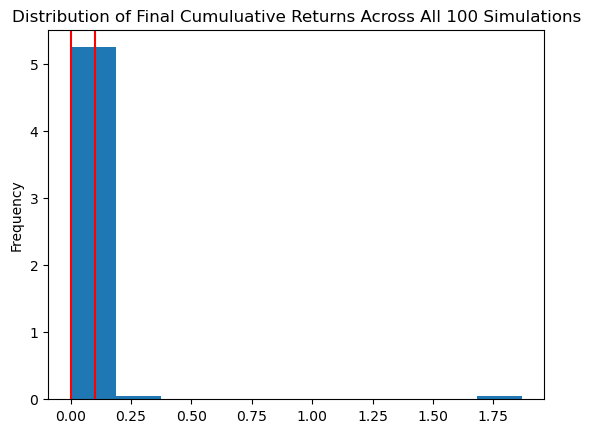

In [46]:
ten_year_simulation.plot_distribution()

In [47]:
ten_year_simulation.summarize_cumulative_return()

count           100.000000
mean              0.033786
std               0.189660
min               0.000002
25%               0.000343
50%               0.002198
75%               0.009223
max               1.866855
95% CI Lower      0.000008
95% CI Upper      0.098557
Name: 2520, dtype: float64